<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [220]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [221]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [222]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [223]:
# текст запроса
query_3_1 = f'''
SELECT
    COUNT(id)
FROM
    public.vacancies
'''


In [224]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [225]:
# текст запроса
query_3_2 = f'''
SELECT
    COUNT(id)
FROM
    public.employers
'''

In [226]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [227]:
# текст запроса
query_3_3 = f'''
SELECT
    COUNT(id)
FROM
    public.areas
'''

In [228]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [229]:
# текст запроса
query_3_4 = f'''
SELECT
    COUNT(id)
FROM
    public.industries
'''

In [230]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,294


***

### выводы по предварительному анализу данных
#### В базе данных содержится информация о 49197 вакансиях от 23501 работодателей из 1362 регионов в 294 сферах деятельности

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [231]:
# текст запроса
query_4_1 = f'''
SELECT 
    COUNT(v.id) cnt,
    a.name area
FROM public.vacancies v 
    JOIN public.areas a 
    ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC 
LIMIT 5
'''

In [232]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [233]:
# текст запроса
query_4_2 = f'''
SELECT
    COUNT(id)
FROM public.vacancies
WHERE salary_from IS NOT NULL 
    OR salary_to IS NOT NULL
'''

In [234]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [235]:
# текст запроса
query_4_3 = f'''
SELECT
   AVG(salary_from),
   AVG(salary_to)
FROM public.vacancies
'''

In [236]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg,avg
0,71064.657901,110536.741923


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [237]:
# текст запроса
query_4_4 = f'''
SELECT
   COUNT(id),
   schedule,
   employment
FROM public.vacancies
GROUP BY schedule, employment
ORDER BY COUNT(id) DESC
LIMIT 2
'''

In [238]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [239]:
# текст запроса
query_4_5 = f'''
SELECT
   COUNT(id),
   experience
FROM public.vacancies
GROUP BY experience
ORDER BY COUNT(id)
'''

In [240]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

### выводы по детальному анализу вакансий:
#### 1. Наибольшее количество вакансий расположено в регионах: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
#### 2. Примерно половина(24073) вакансий указаны с указанием нижнего/верхнего/обоих ценовых порогов
#### 3. Среднее нижней границы зарплаты - 71065 рублей, а верхней - 110537
#### 4. На втором месте по популярности идет комбинация графика и типа трудоустройства: Удалённая работа — Полная занятость
#### 5. Ранжирование поля опыт работы от наименьшего к наибольшему по числу предлагаемых вакансий имеет следующий вид: Более 6 лет — Нет опыта — От 3 до 6 лет — От 1 года до 3 лет    

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [241]:
# текст запроса
query_5_1 = f'''
(SELECT 
   COUNT(v.id),
   e.name
FROM public.vacancies v 
    JOIN public.employers e 
    ON v.employer_id = e.id
GROUP BY e.name
ORDER BY COUNT(v.id) DESC 
LIMIT 1)

UNION 

(SELECT 
   COUNT(v.id),
   e.name
FROM public.vacancies v 
    JOIN public.employers e 
    ON v.employer_id = e.id
GROUP BY e.name
ORDER BY COUNT(v.id) DESC
OFFSET 4
LIMIT 1)
ORDER BY 1 DESC

'''

In [242]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count,name
0,1933,Яндекс
1,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [243]:
# текст запроса
query_5_2 = f'''
SELECT
    a.name area,
    COUNT(distinct e.id) empcnt,
    COUNT(distinct v.id) vaccnt
FROM public.areas a
    left JOIN public.employers e
    ON a.id = e.area
    left JOIN public.vacancies v
    ON a.id = v.area_id 
WHERE v.id IS NULL  
GROUP BY 1
ORDER BY 2 DESC
'''

In [244]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,empcnt,vaccnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [245]:
# текст запроса
query_5_3 = f'''
SELECT
    e.name,
    COUNT(DISTINCT v.area_id)
FROM public.employers e 
    JOIN public.vacancies v 
    ON e.id = v.employer_id
GROUP BY 1
ORDER BY 2 DESC
'''

In [246]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [247]:
# текст запроса
query_5_4 = f'''
SELECT
   COUNT(e.id)
FROM public.employers e
    LEFT JOIN public.employers_industries i 
    ON e.id = i.employer_id
WHERE industry_id IS NULL
'''

In [248]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [249]:
# текст запроса
query_5_5 = f'''
SELECT
    e.name,
    COUNT(i.industry_id)
FROM public.employers e
    LEFT JOIN public.employers_industries i 
    ON e.id = i.employer_id
GROUP BY 1
HAVING COUNT(i.industry_id) = 4
ORDER BY 1
'''

In [250]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
...,...,...
1131,ЮРИОН,4
1132,ЮТИП Технологии,4
1133,ЯКласс,4
1134,ЯрНео,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [251]:
# текст запроса
query_5_6 = f'''
SELECT
    COUNT(e.employer_id)
FROM public.employers_industries e 
    JOIN public.industries i
    ON e.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения'
'''

In [252]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [253]:
# код для получения списка городов-милионников

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
tables = pd.read_html(url) # читаем страницу, получаем список с таблицами
city_df = tables[1] # находим по индексу нужную таблицу - это наш датафрейм из него будем выделять список городов
city_list = list(city_df['Город']) # делаем список из столбца город
city_list[13] = 'Воронеж' # меняем Воронеж[а] на Воронеж, ато как то странно
city_tuple = tuple(city_list) # меняем список на кортеж, ато запрос заругается на квадратные скобки
print(city_tuple)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [254]:
# текст запроса
query_5_7 = f'''
(SELECT
   a.name,
   COUNT(v.id) cnt 
FROM public.areas a 
    JOIN public.vacancies v 
    ON a.id = v.area_id
    JOIN public.employers e 
    ON v.employer_id = e.id 
WHERE e.name = 'Яндекс' AND a.name in {city_tuple}
GROUP BY a.name)

UNION 

(SELECT
   'total',
   COUNT(v.id) cnt 
FROM public.areas a 
    JOIN public.vacancies v 
    ON a.id = v.area_id
    JOIN public.employers e 
    ON v.employer_id = e.id 
WHERE e.name = 'Яндекс' AND a.name in {city_tuple}
)
ORDER BY 2
'''

In [255]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

### Выводы по анализу работодателей:
#### 1. На первом и пятом месте по количеству вакансий находятся компании Яндекс и Газпром нефть
#### 2. Среди регионов в которых нет вакансий первое место по количеству работодателей занимает Россия
#### 3. Максимальное значение по количеству регионов в которых работодатель публикует вакансии 181 от компании Яндекс
#### 4. У 8419 работодателей не указана сфера деятельности
#### 5. 2ГИС - компания, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности
#### 6. В качестве сферы деятельности указана «Разработка программного обеспечения» у 3553 работодателей
#### 7. У Компании Яндекс в городах-милионниках размещено 485 вакансий

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [256]:
# текст запроса
query_6_1 = f'''
SELECT 
   COUNT(id)
FROM public.vacancies
WHERE lower(name) LIKE '%data%' 
    OR lower(name) LIKE '%данн%'
'''

In [257]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [258]:
# текст запроса
query_6_2 = f'''
SELECT 
   COUNT(id)
FROM public.vacancies
WHERE (lower(name) LIKE '%data scientist%'
    OR lower(name) LIKE '%data science%'
    OR lower(name) LIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
    OR lower(name) LIKE '%machine learning%'
    OR lower(name) LIKE '%машинн%обучен%%')
    AND(lower(name) LIKE '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
'''

In [259]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [260]:
# текст запроса
query_6_3 = f'''
SELECT 
   COUNT(id)
FROM public.vacancies
WHERE (lower(name) LIKE '%data scientist%'
    OR lower(name) LIKE '%data science%'
    OR lower(name) LIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
    OR lower(name) LIKE '%machine learning%'
    OR lower(name) LIKE '%машинн%обучен%%')
    AND(key_skills LIKE '%SQL%' OR lower(key_skills) LIKE '%postgres%' )
'''


In [261]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [262]:
# текст запроса
query_6_4 = f'''
SELECT 
   COUNT(id)
FROM public.vacancies
WHERE (lower(name) LIKE '%data scientist%'
    OR lower(name) LIKE '%data science%'
    OR lower(name) LIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
    OR lower(name) LIKE '%machine learning%'
    OR lower(name) LIKE '%машинн%обучен%%')
    AND(key_skills LIKE '%Python%')
'''


In [263]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [264]:
# текст запроса
query_6_5 = f'''
SELECT 
    AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) +1) Key_skills
FROM public.vacancies
WHERE Key_skills IS NOT NULL 
    AND (lower(name) LIKE '%data scientist%'
    OR lower(name) LIKE '%data science%'
    OR lower(name) LIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
    OR lower(name) LIKE '%machine learning%'
    OR lower(name) LIKE '%машинн%обучен%%')
'''

In [265]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
print(round(df['key_skills'].loc[0], 2))

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [266]:
# текст запроса
query_6_6 = f'''
SELECT
    experience,
    
    AVG(COALESCE((salary_from+salary_to)/2, salary_from, salary_to, 0)) 
FROM public.vacancies
WHERE (lower(name) LIKE '%data scientist%'
    OR lower(name) LIKE '%data science%'
    OR lower(name) LIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
    OR lower(name) LIKE '%machine learning%'
    OR lower(name) LIKE '%машинн%обучен%%')
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
'''

In [267]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
a = round(df['avg'].loc[2], 0)
print(f'Средняя зарплата для дата-саентистов с опытом работы от 3 до с лет равна {a}')

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Средняя зарплата для дата-саентистов с опытом работы от 3 до с лет равна 243115.0


***

### Выводы по предметному анализу
#### 1. Из представленного списка 1771 вакансия имеет отношение к данным
#### 2. 51 вакансия подходит для начинающих дата-саентистов
#### 3. В 201 вакансии в качестве ключевого навыка указан SQL или Postges
#### 4. В 351 вакансии указан Python в качестве ключевого навыка
#### 5. В среднем в вакансиях для DS указывают 6.41 ключевых навыков
#### 6. Средняя зарплата в DS  для специалистов с опытом работы от 3 до 6 лет 243115 рублей


# 7.Дополнительные исследования

#### Самые популярные вакансии:

In [268]:
query_7_1 = f'''
SELECT 
    v.name vac_name,
    COUNT(v.name)
FROM public.vacancies v 
    
GROUP BY  v.name
ORDER BY 2 DESC
LIMIT 15
'''

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_10000\3677111367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vac_name'].loc[7] = 'Программист 1С' # Дублирующиеся названия разница в написании, меняем


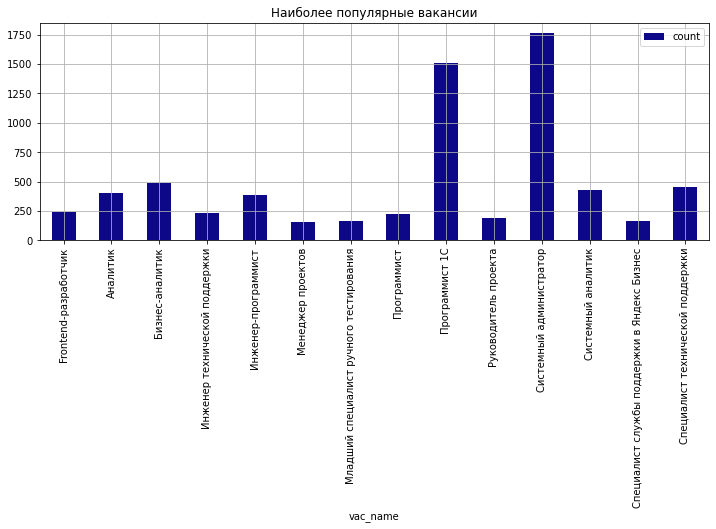

In [269]:
df = pd.read_sql_query(query_7_1, connection)
df['vac_name'].loc[7] = 'Программист 1С' # Дублирующиеся названия разница в написании, меняем
grouped_df = df.groupby(by='vac_name').sum() # Группируем для корректного вывода
grouped_df.sort_values(by='count', ascending=False)
grouped_df.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma',
    title = 'Наиболее популярные вакансии'
);

In [270]:
query_7_2 = f'''
(SELECT
    'города-милионники' cities,
    COUNT(v.name)
FROM public.vacancies v 
    JOIN public.areas a 
    ON v.area_id = a.id
WHERE a.name IN  {city_tuple})

UNION 

(SELECT
    'остальные локации',
    COUNT(v.name)
FROM public.vacancies v 
    JOIN public.areas a 
    ON v.area_id = a.id
WHERE a.name NOT IN  {city_tuple})
'''

e:\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


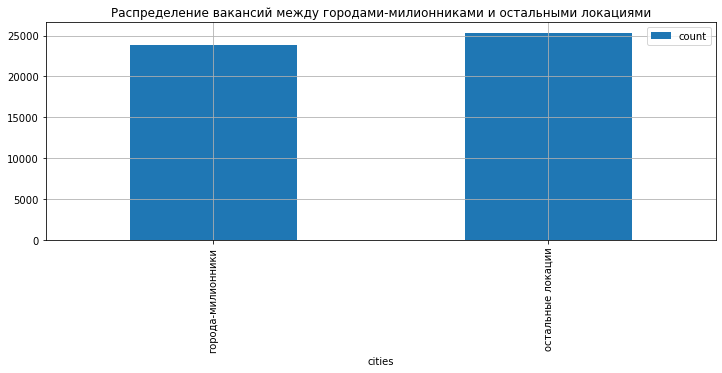

In [271]:
df = pd.read_sql_query(query_7_2, connection)
df.plot(
    kind='bar',
    x='cities',
    grid=True,
    figsize=(12, 4),
        title = 'Распределение вакансий между городами-милионниками и остальными локациями'
);

# Общий вывод по проекту

### подведем итог исследования, обобщите выводы
#### здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
1. В базе находится 49 147 вакансй от 23501 работодателей в 1362 регионах
2. Если брать топ 15 самых популярных вакансий то подавляющее большинство из них так или иначе относятся к сфере IT, что свидетельствует о том что данный рынок активно развивается
3. Совокупное количество вакансий расположенных в городах-милионниках 23856 а в остальных локациях 25341, при том, что в городах-милионникахз проживает 33 процента населения, говорит о том что в крупных городах работу найти проще чем на переферии

#### Варианты для дальнейших исследований:
1. Учитывая что у нас есть база с соискателями и база с работодателями, я думаю, интересно было бы посмотреть как соотносится спрос и предложение, сделать выводы какие специалисты в диффиците и т.д.